In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def get_net(net_type, net_order, rng=None):
    if net_type == 'scale_free':
        return nx.barabasi_albert_graph(n=net_order, m=2, seed=rng, initial_graph=nx.complete_graph(3))

    elif net_type == 'complete_mixing':
        return nx.complete_graph(n=net_order)

    elif net_type == 'lattice':
        return nx.grid_2d_graph(int(np.sqrt(net_order)), int(np.sqrt(net_order)), periodic=False)

    else:
        return None

def degree_distribution(G):
    adjG = nx.to_numpy_array(G)
    degrees = np.zeros(net_order)
    meandegree = 0

    for i in range(0,len(adjG[0])):
        degrees[i] = np.sum(adjG[:,i])

    degmax = int(np.max(degrees))
    degmin = int(np.min(degrees))
    dim = degmax-degmin+1
    degree_distrib = np.zeros((dim,2))

    for j in range(0,dim):
        degree_distrib[j,1] =  j+degmin

    for i in range(0,net_order):
        for j in range(0,dim):
            if(degrees[i]==(j+degmin)):
                degree_distrib[j,0] =  degree_distrib[j,0]+1
    for i in range(0,dim):
        meandegree = meandegree + degree_distrib[i,0]*degree_distrib[i,1]
    meandegree = meandegree/dim
    return degree_distrib,meandegree,dim

def complete_integration(x,distopinionsk,distopinionsl):
    xaxis = np.linspace(start=0,stop=1,num=Ngaps+1)
    yinf = x-threshold*convergence
    ysup = x+threshold*convergence
    ysup2 = yinf + 1/convergence*(x-yinf)
    yinf2 = ysup + 1/convergence*(x-ysup)
    if(yinf<0):
        yinf = 0
    if(ysup>1):
        ysup = 1
    if(yinf2<0):
        yinf2 = 0
    if(ysup2>1):
        ysup2 = 1
    for i in range(0,Ngaps):
        if (xaxis[i]<=yinf<xaxis[i+1]):
            gapinf = i
        if (xaxis[i]<ysup<=xaxis[i+1]):
            gapsup = i+1
        if (xaxis[i]<=yinf2<xaxis[i+1]):
            gapinf2 = i
        if (xaxis[i]<ysup2<=xaxis[i+1]):
            gapsup2 = i+1
    ind=gapsup2-gapinf2-1
    jump = int(ind/(gapsup-gapinf-1))
    positiveint = 0
    for j in range(gapinf,gapsup):
        positiveint = positiveint + distopinionsk[j]*distopinionsl[ind+1]
        ind = ind - jump
    yinfneg = np.round(x-threshold,4)
    ysupneg = np.round(x+threshold,4)
    if(yinfneg<0):
        yinfneg = 0
    if(ysupneg>1):
        ysupneg = 1
    for i in range(0,Ngaps):
        if (xaxis[i]<=yinfneg<xaxis[i+1]):
            gapinfneg = i
        if (xaxis[i]<ysupneg<=xaxis[i+1]):
            gapsupneg = i+1
        if (xaxis[i]<=x<=xaxis[i+1]):
            xind = i
    negativeint = 0
    for j in range(gapinfneg,gapsupneg):
        negativeint = negativeint + distopinionsk[xind]*distopinionsl[j]
    return (1/threshold*positiveint-negativeint)
    
def functionf(x,k,opiniondistrib):
    totalsum = 0
    for i in range(0,dim):
        ql = degree_distrib[i,0]/net_order
        totalsum = totalsum + k*degree_distrib[i,1]*ql/(meandegree**2)*complete_integration(x,opiniondistrib[k,:],opiniondistrib[i,:])
    return totalsum

def degree_basedMF(G,dt,opiniondistrib):
    totaldistrib = np.zeros(Ngaps)
    print('hasta aqui')
    for t in range(1,4):
        for j in range(0,Ngaps):
            x = j/Ngaps
            for i in range(0,dim):
                opiniondistrib[i,j,t] = opiniondistrib[i,j,t-1] + dt*functionf(x,i,opiniondistrib[:,:,t-1])
    print('hasta aqui')
    for t in range(4,Nsteps):
        for j in range(0,Ngaps):
            x = j/Ngaps
            for i in range(0,dim):
                opiniondistrib[i,j,t] = opiniondistrib[i,j,t-1]+dt*(55/24*functionf(x,i,opiniondistrib[:,:,t-1])
                                                                            -59/24*functionf(x,i,opiniondistrib[:,:,t-2])
                                                                            +37/24*functionf(x,i,opiniondistrib[:,:,t-3])
                                                                            -9/24*functionf(x,i,opiniondistrib[:,:,t-4]))
                totaldistrib[j] = totaldistrib[j] + degree_distrib[i,0]/net_order*opiniondistrib[i,j,t]
        print('hasta aqui{}'.format(t))
        opiniondistrib[:,:,t-4] = opiniondistrib[:,:,t-3]
        opiniondistrib[:,:,t-3] = opiniondistrib[:,:,t-2]
        opiniondistrib[:,:,t-2] = opiniondistrib[:,:,t-1]
        opiniondistrib[:,:,t-1] = opiniondistrib[:,:,t]
            
    return opiniondistrib,totaldistrib  

hasta aqui
hasta aqui
hasta aqui4
hasta aqui5
hasta aqui6
hasta aqui
hasta aqui
hasta aqui4
hasta aqui5
hasta aqui6
hasta aqui
hasta aqui
hasta aqui4
hasta aqui5
hasta aqui6
hasta aqui
hasta aqui
hasta aqui4
hasta aqui5
hasta aqui6


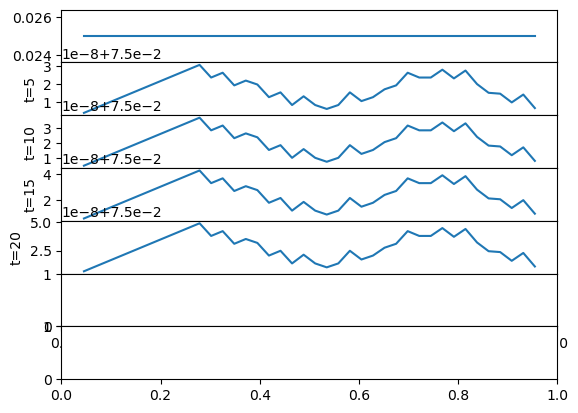

In [66]:
net_order = 900
symmetric_updating = False
threshold = 0.45
convergence = 0.5
Ngaps = 40
Nsteps = 7
dt=0.0001
totaldist = np.zeros((Ngaps,5))

fig,ax = plt.subplots(Nsteps,1)

G = get_net('scale_free',net_order=net_order,rng=None)
degree_distrib,meandegree,dim = degree_distribution(G)
opiniondistrib = np.zeros((dim,Ngaps,Nsteps))

for j in range(0,Ngaps):
    for i in range(0,dim):
        opiniondistrib[i][j][0] = 1/Ngaps
    totaldist[j,0] = 1/Ngaps

ax[0].plot(np.linspace(start=0,stop=1,num=Ngaps),totaldist[:,0])
        
for i in range(1,5):
    opiniondistrib,totaldist[:,i] = degree_basedMF(G,dt,opiniondistrib)
    ax[i].plot(np.linspace(start=0,stop=1,num=Ngaps),totaldist[:,i])
    ax[i].set_ylabel("t={}".format(i*5))
    #ax[i].set_ylim(0,7)

plt.subplots_adjust(hspace=0)

In [ ]:
net_order = 900
symmetric_updating = False
threshold = 0.3
convergence = 0.2
Ngaps = 40
Nsteps = 5
dt=0.0001
totaldist = np.zeros((Ngaps,5))
G = get_net('scale_free',net_order=net_order,rng=None)
degree_distrib,meandegree,dim = degree_distribution(G)
opiniondistrib = np.zeros((Ngaps,2))
print(np.shape(opiniondistrib))

for i in range(0,Ngaps):
        opiniondistrib[i,0] = 1/Ngaps
        opiniondistrib[i,1] = 1/Ngaps

num = complete_integration(0.3,opiniondistrib[:,0],opiniondistrib[:,1])
print(num)

In [60]:
net_order = 900
symmetric_updating = False
threshold = 0.5
convergence = 0.3
Ngaps = 40
Nsteps = 5
dt=0.0001
totaldist = np.zeros((Ngaps,5))

G = get_net('scale_free',net_order=net_order,rng=None)
degree_distrib,meandegree,dim = degree_distribution(G)
opiniondistrib = np.zeros((dim,Ngaps))

for j in range(0,Ngaps):
    for i in range(0,dim):
        opiniondistrib[i][j] = 1/Ngaps
        
functionf(x=0.3,k=5,opiniondistrib=opiniondistrib)

0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.020000000000000014
0.016250000000000007 0.02000000000

-4.6953255425709605e-05